![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/S1_PCA/main/figs/taller-meca-aprendizaje%20no%20supervisado_banner%201169%20x%20200%20px%20-05.png)

#  Análisis de Componentes Principales. Fundamentos Teóricos.

Este *cuaderno* trata sobre el Análisis de Componentes Principales y sobre la manera en que se puede utilizarlos para reducir la dimensionalidad de datos. El objetivo del *cuaderno* es que aprenda que son los componentes principales, que reconozca las características y el funcionamiento del algoritmo de componentes principales, y a construir e implementar este algoritmo.

**NO** es necesario editar el archivo o hacer una entrega. Sin embargo, los ejemplos contienen celdas con código ejecutable (`en gris`), que podrá modificar  libremente. Esta puede ser una buena forma de aprender nuevas funcionalidades del *cuaderno*, o experimentar variaciones en los códigos de ejemplo.

## Introducción

Los grandes conjuntos de datos son cada vez más comunes y, a menudo, difíciles de interpretar. Para abordar este reto, es clave contar con métodos que permitan reducir drásticamente su dimensionalidad, conservando al mismo tiempo la mayor cantidad posible de información.

El análisis de componentes principales, o PCA por sus siglas en inglés, es una técnica de aprendizaje no supervisado que facilita esta tarea. La idea central del análisis de componentes principales es reducir la dimensionalidad de un conjunto de datos en el que hay una gran cantidad de variables interrelacionadas, conservando al mismo tiempo la mayor cantidad posible de la variación presente en el conjunto de datos. Esta reducción se logra transformando las variables originales en un nuevo conjunto de variables, los componentes principales, que no están correlacionados y que se ordenan de manera que los primeros retengan la mayor parte de la variación presente en todas las variables originales.

PCA se refiere entonces al proceso por el cual los componentes principales son calculados, y el uso de estos componentes para entender los datos. PCA forma parte del aprendizaje no supervisado, ya que implica un conjunto de variables $X_1, \dots, X_k$ y no una respuesta asociada $Y$. PCA es fundamentalmente un algoritmo de reducción de dimensionalidad, pero también puede ser útil como herramienta de visualización, filtrado de ruido, extracción e ingeniería de características, y mucho más.

Para entender de manera intuitiva el comportamiento del Análisis de Componentes Principales (PCA), es útil examinarlo a través de un conjunto de datos bidimensional. A continuación, consideremos un ejemplo con 200 observaciones:

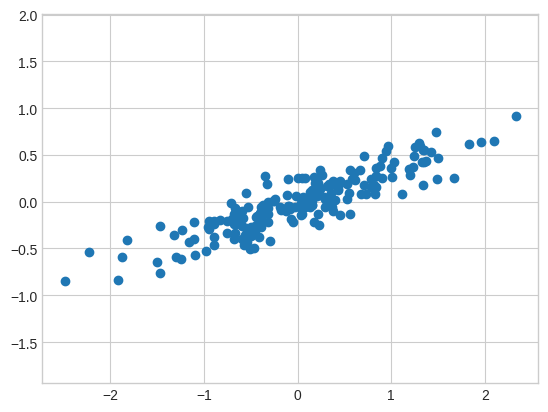

In [7]:
#Cargamos las librerías a utilizar
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

A simple vista, es evidente que existe una relación casi lineal entre las variables x e y. Esto parece ser similar a la regresión lineal, sin embargo el contexto del problema aquí es ligeramente diferente: en lugar de intentar predecir los valores de y a partir de los valores de x, el problema de aprendizaje no supervisado intenta aprender sobre la relación entre las variables x e y.


En el análisis de componentes principales, esta relación se cuantifica encontrando una lista de los ejes principales en los datos y utilizando estos ejes para describir el conjunto de datos. Usando el estimador PCA de [Scikit-Learn](https://scikit-learn.org/), podemos calcularlo de la siguiente manera:


In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

Ese estimador "aprende" los componentes,

In [9]:
print(pca.components_)

[[ 0.94446029  0.32862557]
 [-0.32862557  0.94446029]]


y la varianza explicada,

In [10]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


Para comprender mejor qué significan estos números, visualicémoslos como vectores sobre los datos originales, utilizando los componentes para definir la dirección del vector y la varianza explicada para definir la longitud cuadrada del vector:

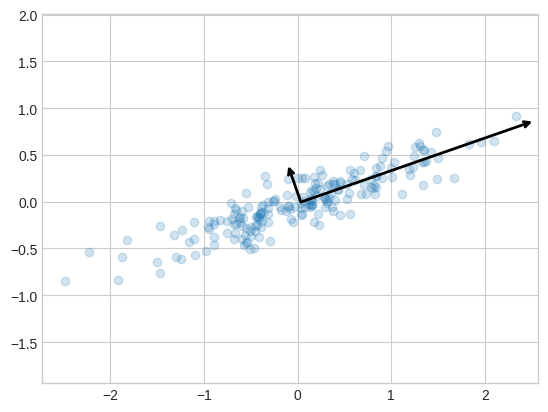

In [11]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');


Estos vectores representan los ejes principales de los datos originales, y la longitud de cada vector indica cuán "importante" es ese eje para describir la distribución de los datos, más precisamente, es una medida de la varianza de los datos cuando se proyectan sobre ese eje. La proyección de cada punto de datos sobre los ejes principales son los componentes principales de los datos.

Podemos entonces graficar los datos originales junto a esta proyección:

[Text(0.5, 0, 'componente 1'),
 Text(0, 0.5, 'componente 2'),
 Text(0.5, 1.0, 'Componentes Principales'),
 (-5.0, 5.0),
 (-3.0, 3.1)]

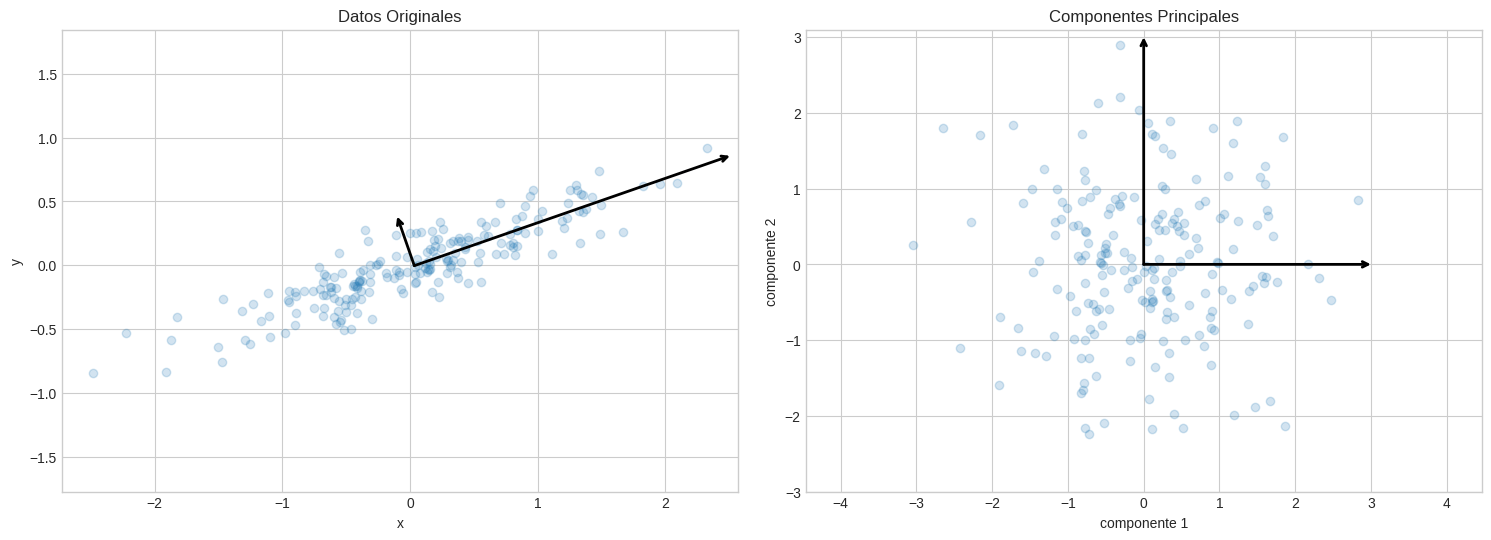

In [12]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='Datos Originales')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='componente 1', ylabel='componente 2',
          title='Componentes Principales',
          xlim=(-5, 5), ylim=(-3, 3.1))


Cuando representamos visualmente estos componentes principales junto a los datos originales, lo que hacemos es crear una comparación visual entre la distribución original de los datos y la nueva representación derivada a través del PCA.  En el primer gráfico, vemos los datos originales en un sistema de coordenadas estándar, donde cada punto representa una observación individual con sus respectivos valores de las variables x e y. Tenemos también los vectores que representan los componentes principales.

El segundo gráfico muestra los datos proyectados, que son los componentes principales. Estos no están en el mismo espacio de características original sino en un nuevo sistema de coordenadas definido por los componentes principales. Estos ejes representan las nuevas direcciones en las que los datos tienen la mayor varianza. Los puntos en este gráfico son proyecciones de los datos originales sobre estos nuevos ejes.

Esta transformación de los ejes de datos a ejes principales constituye una transformación afín, que implica una traslación, rotación y escalamiento uniforme.

Aunque encontrar componentes principales pueda parecer una curiosidad matemática, en realidad tiene aplicaciones muy importnate en el mundo del aprendizaje de máquinas.

## PCA como Reducción de Dimensionalidad

¿Cómo está relacionado entonces el concepto de PCA con la reducción de dimensionalidad? El Análisis de Componentes Principales (PCA) desempeña un papel crucial en la reducción de dimensionalidad. Este proceso implica simplificar la complejidad de los datos al eliminar las direcciones menos significativas. Esto se logra 'anulando' uno o más de los componentes principales menos importantes, aquellos que contribuyen mínimamente a la varianza total. De esta manera, se proyectan los datos en un espacio de menor dimensión mientras se conserva la máxima cantidad de información relevante.

Veamos un ejemplo práctico de cómo el PCA se emplea como una herramienta de transformación y reducción de dimensionalidad:

In [13]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("forma original:   ", X.shape)
print("forma transformada:", X_pca.shape)


forma original:    (200, 2)
forma transformada: (200, 1)


Los datos transformados han sido reducidos a una sola dimensión. Para entender el efecto de esta reducción de dimensionalidad, podemos realizar la transformación inversa de estos datos reducidos y representarlos junto con los datos originales:

(np.float64(-2.731158226766438),
 np.float64(2.609901883259332),
 np.float64(-0.967276570638932),
 np.float64(1.006064230853995))

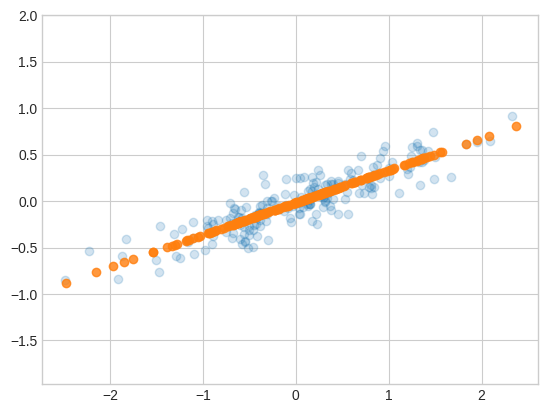

In [14]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')


Los puntos claros representan los datos originales, mientras que los puntos oscuros son la versión proyectada. Esto ilustra claramente qué significa una reducción de dimensionalidad mediante PCA: la información a lo largo del eje o ejes menos importantes se elimina, dejando solo el(los) componente(s) de los datos con la mayor varianza. La fracción de varianza que se elimina (proporcional a la dispersión de los puntos alrededor de la línea formada en la figura anterior) es aproximadamente una medida de cuánta "información" se descarta en esta reducción de dimensionalidad.

Este conjunto de datos de dimensión reducida resulta, en muchos casos, suficientemente informativo para capturar las relaciones más importantes entre los datos. A pesar de que el número de características se ha reducido en un 50%, las relaciones esenciales entre los puntos de datos se mantienen en gran medida. Esto demuestra la eficacia del PCA para preservar la estructura fundamental de los datos incluso cuando se reduce su complejidad.


Para entender mejor cómo funciona esta técnica, es importante profundizar en el concepto de los componentes principales.

## ¿Qué son los componentes principales?



La utilidad de la reducción de dimensionalidad puede no ser obvia en dos dimensiones, pero se vuelve mucho más clara cuando tenemos datos altamente dimensionales.

Supongamos que tenemos $ n $ observaciones, cada una con $ k $ variables o atributos, representadas por $ X_1, X_2, \dots, X_k $. Por ejemplo, consideremos los gastos individuales promedio de las 38 ciudades relevadas por la [Encuesta Nacional de Presupuestos de los Hogares (ENPH) de Colombia](https://www.dane.gov.co/index.php/estadisticas-por-tema/pobreza-y-condiciones-de-vida/encuesta-nacional-de-presupuestos-de-los-hogares-enph) del DANE en 2017, que mide 12 categorías de gastos. Aquí, $ n $ serían las 38 ciudades y $ k $ las 12 variables asociadas al gasto.

Una forma de examinar las relaciones entre estas variables sería mediante diagramas de dispersión para las $ n $ observaciones, examinando dos variables por vez. Sin embargo, con 12 variables, tendríamos que examinar 66 gráficas $\left(\binom{12}{2} = \frac{12 \times 11}{2} = 66\right)$.

Si $ k $ es muy grande, como suele ser en estas aplicaciones, sería impracticable examinar todas las gráficas. Además, este método puede no ser muy informativo, ya que cada gráfico contiene solo una pequeña porción de toda la información disponible.

Necesitamos entonces un método que nos permita encontrar una representación de baja dimensionalidad que contenga la mayor información posible. Siguiendo el ejemplo, buscaríamos representar estos datos de manera que capturemos la esencia de las 38 ciudades en un espacio reducido.

Intuitivamente, el PCA plantea que cada observación se encuentra en un espacio $ k $-dimensional, pero no todas estas dimensiones son igualmente informativas. Por lo tanto, el PCA busca representar, o mejor dicho, proyectar, los datos originales a un espacio de menor dimensión de forma tal de retener la mayor cantidad de información posible. Estas nuevas dimensiones, encontradas por el PCA y llamadas componentes, son combinaciones lineales de las variables originales. El primer componente entonces tomará la forma:

$$
f_1 = \delta_{11} X_1 + \delta_{12} X_2 + \dots + \delta_{1k} X_k
$$

donde $ f_1 $ denota el primer componente principal y los $ \delta_{ij} $ son conocidos como pesos o *loadings* del primer componente principal. Esta ecuación claramente muestra  que el primer componente principal es una combinación lineal de las variables originales.

Dado que solo contamos datos sobre  $ X_1, X_2, \dots, X_k $, surge la pregunta: ¿Cómo se calculan estos
$\delta$'s que me permiten constuir los componentes?


## Cálculo de los componentes

### Cálculo del primer componente


Formalmente, supongamos que $X$ es una matriz $n \times k$ que contiene los datos de $n$ observaciones y $k$ variables, cada una centrada para tener media cero. La matriz $X$ tiene asociada una matriz de covarianza $S = \text{Var}(X)$, que es una matriz cuadrada de orden $k$.

El objetivo del primer componente principal es encontrar la combinación lineal de las variables originales que maximice la varianza, preservando así la mayor cantidad de información posible. Esto se logra mediante el índice $f_1$, definido como:


\begin{align}
f_1 &= X \delta'_1 \\
    &= \delta_{11} X_1+ \delta_{12} X_2 + \dots + \delta_{1k} X_k
\end{align}

donde $\delta_1$ es un vector de $k$ números reales $(\delta_1 = \delta_{11}, \dots, \delta_{1k})$. El desafío es seleccionar $\delta_1$ óptimamente, ya que este índice será la "mejor" combinación lineal de $X_1, X_2, \dots, X_k$.

Definimos como "mejor" a aquella combinación lineal que maximiza la varianza. Dicho de otra forma, vamos a buscar maximizar la varianza de forma tal que podamos reproducir de la mejor manera posible la variabilidad (información) original de las variables $x_j$.

Notando que

\begin{align}
Var(f_1) &= Var(X \delta'_1) \\
       &= \delta_1 Var(X ) \delta'_1 \\
       &= \delta_1 S \delta'_1
\end{align}

el problema se reduce a elegir $\delta_1$ de forma que maximice $Var(X \delta_1)$. Maximizar $\delta_1 S \delta'_1$ tiene como solución trivial llevar $\delta_1$ a infinito $(\delta_1 \rightarrow \infty)$.



Para evitar la solución trivial de $\delta_1$ tendiendo a infinito, añadimos una restricción adicional que normaliza $\delta_1$:

\begin{align}
\delta_1\delta'_1=1
\end{align}

Esto restringe a que la suma del cuadrado de los  pesos o *loadings* sean igual a uno, ya que si lo restringimos a que sea un número arbitrariamente grande esto podría resultar en una varianza arbitrariamente grande.

El problema entonces queda definido como:

\begin{align}
\underset{\delta_1}{max}\,\, \delta_1 S \delta'_1 \\
\text{sujeto a}  \\
\delta_1 \delta'_1 = 1
\end{align}

El Lagrangiano asociado es:

\begin{align}
L = \delta_1 S \delta'_1 + \lambda_1 (1-\delta_1\delta'_1)
\end{align}

y maximizamos esta expresión de la forma habitual derivando respecto a $\delta_1$ e igualando a cero:

\begin{align}
\frac{\partial \ L}{\partial \delta_1}=S \delta'_1 - \lambda_1 \delta'_1 =0
\end{align}

Reordenando:

\begin{align}
S \delta'_1 = \lambda_1 \delta'_1
\end{align}

En el óptimo, $\delta_1$ es el eigenvector correspondiente al eigenvalor $\lambda$. Pre multiplicando la ecuación anterior por $\delta_1$ y usando la restricción $\delta_1\delta'_1=1$:

\begin{align}
\delta_1 S \delta'_1 = \lambda_1
\end{align}

para maximizar $\delta_1 S \delta'_1$ debemos elegir $\lambda_1$ igual al máximo eigenvalor de $S$ y $\delta_1$ igual al eigenvalor correspondiente. Notando además que $\delta_1 S \delta'_1=Var(X \delta'_1)$, el problema de encontrar la mejor combinación lineal que reproduce la variabilidad en $X$ se reduce a encontrar el mayor eigenvalor de $S$ y su correspondiente eigenvector.


#### Ejemplo cálculo primer componente

Ilustremos en detalle el cálculo del primer componente principal en `Python` utilizando los datos mencionados anteriormente de la  
[Encuesta Nacional de Presupuestos de los Hogares (ENPH) de Colombia](https://www.dane.gov.co/index.php/estadisticas-por-tema/pobreza-y-condiciones-de-vida/encuesta-nacional-de-presupuestos-de-los-hogares-enph), realizada por el DANE en 2017. El archivo `gasto_col_2017_norm_all.csv` disponible en la carpeta `data`, contiene los gastos individuales promedios estandarizados en las 12 divisiones que releva el DANE para 38 ciudades colombianas.

In [16]:
#Cargamos las librerías a utilizar
import numpy as np
import pandas as pd

# Cargamos y visualizamos la primeras observaciones de los datos
gasto = pd.read_csv('https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/s1_PCA/main/data/gasto_col_2017_norm_all.csv')
gasto = gasto.set_index("Ciudad")
gasto.head()

,Alimentos y bebidas no alcohólicas,Bebidas alcohólicas y tabaco,Prendas de vestir y calzado,"Alojamiento, agua, electricidad, gas y otros combustibles","Muebles, artículos para el hogar y para la conservación ordinaria del hogar",Salud,Transporte,Información y comunicación,Recreación y cultura,Educación,Restaurantes y hoteles,Bienes y servicios diversos
Ciudad,,,,,,,,,,,,
Arauca,-0.893243,-1.491704,-1.212847,-0.187501,-0.765951,-0.125062,-1.344088,-0.438465,-0.757958,-1.028321,-0.413888,-0.778491
Armenia,1.411143,-0.317263,1.339782,0.137351,1.208855,0.434314,0.691669,0.965570,1.631818,0.528711,0.552798,1.380602
Barrancabermeja,-1.145930,0.551373,-0.644432,1.074275,-0.491341,-0.752697,-0.093582,0.292479,-0.566821,0.966586,-0.519878,-0.693592
Barranquilla,-0.183745,-0.774835,-0.837466,0.785821,0.114857,-0.859420,0.275332,0.132708,-0.651846,0.503810,0.101591,-0.368188
Bogotá,1.355724,0.255023,1.774131,2.718554,2.523217,2.745217,2.313395,2.381936,2.830021,3.943969,2.210651,3.572333


La matriz de varianzas es:

In [17]:
S = gasto.cov()
S

,Alimentos y bebidas no alcohólicas,Bebidas alcohólicas y tabaco,Prendas de vestir y calzado,"Alojamiento, agua, electricidad, gas y otros combustibles","Muebles, artículos para el hogar y para la conservación ordinaria del hogar",Salud,Transporte,Información y comunicación,Recreación y cultura,Educación,Restaurantes y hoteles,Bienes y servicios diversos
Alimentos y bebidas no alcohólicas,1.000000,-0.109692,0.495619,0.582737,0.495742,0.471145,0.608363,0.571717,0.573661,0.312434,0.597362,0.567729
Bebidas alcohólicas y tabaco,-0.109692,1.000000,0.306479,0.123159,0.160313,0.217241,0.061755,0.097980,0.114252,0.391655,0.272012,0.112145
Prendas de vestir y calzado,0.495619,0.306479,1.000000,0.585451,0.727421,0.662653,0.715641,0.762142,0.809477,0.516538,0.614922,0.752943
"Alojamiento, agua, electricidad, gas y otros combustibles",0.582737,0.123159,0.585451,1.000000,0.713916,0.636513,0.845582,0.902452,0.723503,0.715976,0.752515,0.700189
"Muebles, artículos para el hogar y para la conservación ordinaria del hogar",0.495742,0.160313,0.727421,0.713916,1.000000,0.831954,0.711275,0.817359,0.852655,0.730507,0.717116,0.906378
Salud,0.471145,0.217241,0.662653,0.636513,0.831954,1.000000,0.687662,0.756753,0.759222,0.644640,0.575923,0.862940
Transporte,0.608363,0.061755,0.715641,0.845582,0.711275,0.687662,1.000000,0.876501,0.753856,0.541518,0.609104,0.744365
Información y comunicación,0.571717,0.097980,0.762142,0.902452,0.817359,0.756753,0.876501,1.000000,0.820075,0.661615,0.723408,0.811954
Recreación y cultura,0.573661,0.114252,0.809477,0.723503,0.852655,0.759222,0.753856,0.820075,1.000000,0.728247,0.663229,0.901303
Educación,0.312434,0.391655,0.516538,0.715976,0.730507,0.644640,0.541518,0.661615,0.728247,1.000000,0.607793,0.756648


Los valores propios son las raíces de la ecuación:

$$|S-\lambda I| =0 $$

y los obtenemos en `Python` con:

In [18]:
eig_val, eig_vec = np.linalg.eig(S)
eig_val

array([8.04161786, 1.24800433, 0.69064927, 0.56682795, 0.47481665,
       0.31851504, 0.29033023, 0.03105681, 0.04900975, 0.111482  ,
       0.09836909, 0.07932102])

El máximo eigenvalor es el primero y el eigenvector  asociado a este eigenvalor nos dará los pesos o *loadings* del primer componente principal:

In [19]:
eig_vec=eig_vec.T
eig_vec[[0]].round(2)

array([[0.23, 0.07, 0.29, 0.31, 0.32, 0.3 , 0.3 , 0.33, 0.32, 0.28, 0.28,
        0.33]])

Por lo tanto, el primer componente principal es:

\begin{align}
f_1 =  0.23 \times \text{Alimentos y bebidas no alcohólicas} + 0.07 \times \text{Bebidas alcohólicas y tabaco} + \dots + 0.33 \times \text{Bienes y servicios diversos}
\end{align}

Calculando este componente para cada una de las ciudades tenemos entonces un índice que reduce las tres variables en una:

In [20]:
f1=gasto.dot(eig_vec[[0]].T) #calculamos f1
f1.columns = ['CP1'] #nombramos la columna del primer componente como CP1
f1.head()

,CP1
Ciudad,
Arauca,-2.465760
Armenia,3.062761
Barrancabermeja,-0.687593
Barranquilla,-0.359423
Bogotá,8.604254


Si ordenamos las ciudades según esta nueva variable construida (PCA), se puede notar que las ciudades quedan prácticamente ordenadas por su ingreso. El primer componente principal entonces esta proyectando sobre una medida relacionada al poder de gasto de las ciudades.

In [21]:
f1.sort_values(by='CP1', ascending=False).head()

,CP1
Ciudad,
Bogotá,8.604254
Medellín y A.M.,4.429535
Manizales y A.M.,4.134911
Tunja,3.806251
Bucaramanga y A.M.,3.747163


### Cálculo del segundo componente principal

Luego de calcular el primer componente principal $f_1$, podemos encontrar también el segundo componente principal, $f_2$:

\begin{align}
f_2 &= X \delta'_2 \\
    &= \delta_{21} X_1+ \delta_{22} X_2 + \dots + \delta_{2k} X_k
\end{align}

El segundo componente principal, será la combinación lineal que tiene la máxima varianza de todas las combinaciones lineales ortogonales a $f_1$. En otras palabras, responde a la pregunta: ¿Cuál es la mejor combinación lineal de las variables $X_1,X_2,\dots,X_k$ no correlacionada al primer componente principal? Intuitivamente, esta es la "segunda mejor" combinación lineal de $X_1,X_2,\dots,X_k$, que no esta contenida en el primer componente.



El cálculo del segundo componente entonces responde al siguiente problema:

\begin{align}
\underset{\delta_2}{max}\,\, \delta_2 S \delta'_2 \\
\text{sujeto a}   \\
\delta_2 \delta'_2 &= 1  
y \\
\delta_2 \delta'_1 &=0 \\ \nonumber
\end{align}


Donde el objetivo a maximizar y la primera restricción son similares al del problema del primer componente. La diferencia surge en la segunda restricción donde imponemos que $\delta_1 \delta'_2  =0$ lo que asegura que los componentes no estén correlacionados (que sean ortogonales). Escribiendo el Lagrangiano,

\begin{align}
L = \delta_2 S \delta'_2 + \lambda_2 (1-\delta_2\delta'_2 + \lambda_{21} (0-\delta_1 \delta'_2)
\end{align}

y maximizaremos esta expresión de la forma habitual derivando respecto a $\delta_2$ e igualando a cero:

\begin{align}
\frac{\partial L}{\partial \delta_2}= -2 S \delta'_2 - \lambda_2 2 \delta'_2 - \lambda_{21}\delta'_1=0
\end{align}

Pre multiplicando por $\delta_1$


\begin{align}
     -2 \delta_1 S \delta'_2 - \lambda_2 2 \delta_1 \delta'_2 - \lambda_{21}\delta_1 \delta'_1 = 0
\end{align}

Notemos que $\delta_1 \delta'_1 =1$ por lo tanto $\lambda_{21}=0$, y que $\delta_1 \delta'_2 =0$. Usando estas  ecuaciones tenemos:


\begin{align}
 S \delta'_2 &= \lambda_2 \delta'_2 \\
\delta_2  S \delta'_2 &= \lambda_2
\end{align}


De forma que $\delta_2$ es un eigenvector de $S$, y puesto que queremos maximizar la varianza, deberíamos elegir el eigenvector asociado al eigenvalue mas grande, pero este ya lo utilizamos para el primer componente. Entonces $\delta_2$  es el eigenvector asociado al segundo eigenvalue mas grande.



Siguiendo esta lógica, por inducción es posible seguir calculando componentes cada uno ortogonal entre si y decrecientes en importancia. En general, para una matriz $X$ con  $n$ observaciones y $k$ variables tiene al menos el mínimo entre el número de observaciones menos 1 $(n-1)$ y el número de variables $(k)$, i.e.  $min(n-1,k)$, componentes principales distintos.


#### Ejemplo cálculo PCA (cont.)

Continuando con el ejemplo anterior, el segundo componente principal es aquel que esta asociado al segundo eigenvalue mayor, que es 1.24.


In [22]:
eig_val

array([8.04161786, 1.24800433, 0.69064927, 0.56682795, 0.47481665,
       0.31851504, 0.29033023, 0.03105681, 0.04900975, 0.111482  ,
       0.09836909, 0.07932102])

El eigenvector asociado a este eigenvalue:

In [23]:
eig_vec[[1]]

array([[ 0.41437165, -0.80733806, -0.09214338,  0.08698263, -0.04041083,
        -0.07335521,  0.18556878,  0.10101598,  0.03214793, -0.32333552,
        -0.05470794,  0.01478763]])

El segundo componente principal es:

\begin{align}
f_2 =  -0.46 \times \text{Alimentos y bebidas no alcohólicas} + (-0.35) \times \text{Bebidas alcohólicas y tabaco} + \dots + 0.31 \times \text{Bienes y servicios diversos}
\end{align}

Calculando este para cada una de las ciudades tenemos entonces un índice que reduce las tres variables en una:

In [24]:
f2=gasto.dot(eig_vec[[1]].T) #calculamos f2
f2.columns = ['CP2'] #nombramos la columna del primer componente como CP2
f2.sort_values(by='CP2', ascending=False).head()

,CP2
Ciudad,
Rionegro,1.590442
Mitú,1.317832
Bucaramanga y A.M.,1.064920
Pereira y A.M.,1.028697
Arauca,0.995292


## Cálculo de componentes principales con el paquete  `PCA`


Ahora, vamos a realizar el cálculo de los componentes pricipales utilizando el paquete [pca](https://pypi.org/project/pca/) disponible en `PyPI`. Esta biblioteca es una herramienta de análisis de componentes principales que proporciona una interfaz fácil de usar y expande las capacidades que tiene la clase  [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)  de la librería [scikit-learn](https://scikit-learn.org/stable/)



Entonces iniciemos importando la librería:

In [26]:
pip install pca

In [27]:
# Carguemos el paquete
from pca import pca

Con el paquete [pca](https://pypi.org/project/pca/)  importado, el siguiente paso es inicializar un objeto PCA. La biblioteca `pca` proporciona una clase `pca` que podemos utilizar para este propósito. Una vez que tengamos nuestro objeto PCA, podemos ajustarlo a nuestros datos.

A diferencia de la biblioteca scikit-learn](https://scikit-learn.org/stable/)
, el paquete [pca](https://pypi.org/project/pca/)  combina los pasos de ajuste y transformación en una sola función, lo que simplifica el proceso. Además, este paquete proporciona visualizaciones integradas que nos permiten ver fácilmente los resultados del PCA.

Vamos a inicializar nuestro objeto PCA y ajustarlo a nuestros datos.

In [28]:
# Inicializamos el objeto PCA
model = pca(n_components=2)

In [29]:
# Ajustamos el PCA a nuestros datos
gasto_pca = model.fit_transform(gasto, verbose=False)

El método nos retorna un diccionario con multiples componentes. Por ahora nos interesan particularmente los *loadings*

In [30]:
gasto_pca['loadings']

,Alimentos y bebidas no alcohólicas,Bebidas alcohólicas y tabaco,Prendas de vestir y calzado,"Alojamiento, agua, electricidad, gas y otros combustibles","Muebles, artículos para el hogar y para la conservación ordinaria del hogar",Salud,Transporte,Información y comunicación,Recreación y cultura,Educación,Restaurantes y hoteles,Bienes y servicios diversos
PC1,0.229523,0.075000,0.290238,0.307090,0.322190,0.299419,0.304631,0.328533,0.324178,0.275263,0.283823,0.327937
PC2,-0.414372,0.807338,0.092143,-0.086983,0.040411,0.073355,-0.185569,-0.101016,-0.032148,0.323336,0.054708,-0.014788


Y los componentes principales.

In [31]:
gasto_pca['PC']

,PC1,PC2
Arauca,-2.465760,-0.995292
Armenia,3.062761,-0.746234
Barrancabermeja,-0.687593,0.992482
Barranquilla,-0.359423,-0.622977
Bogotá,8.604254,0.456917
Bucaramanga y A.M.,3.747163,-1.064920
Buenaventura,-2.177006,0.124911
Cali,3.356678,0.302655
Cartagena,-0.401153,0.012728
Cúcuta y A.M.,-0.939191,-0.925839


 Notemos que son numericamente iguales a los encontrados anteriormente, aunque no necesariamente coincide el signo (estudiaremos por qué sucede esto en el próximo cuaderno).

La biblioteca `pca` proporciona varias funcionalidades extras. Entre ellas la función `biplot` que nos permite visualizar fácilmente los componentes principales y los *loadings* en un sólo gráfico.  Este tipo de gráfico nos muestra tanto las puntuaciones de las observaciones (en este caso, las ciudades) como los vectores de carga de las variables (características de los gastos) en el mismo espacio de representación. Esto es útil porque te permite ver la relación entre las observaciones, cómo se relacionan con las dimensiones del PCA, y cómo las variables contribuyen a estas dimensiones.

Creemos un biplot de nuestros resultados:

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


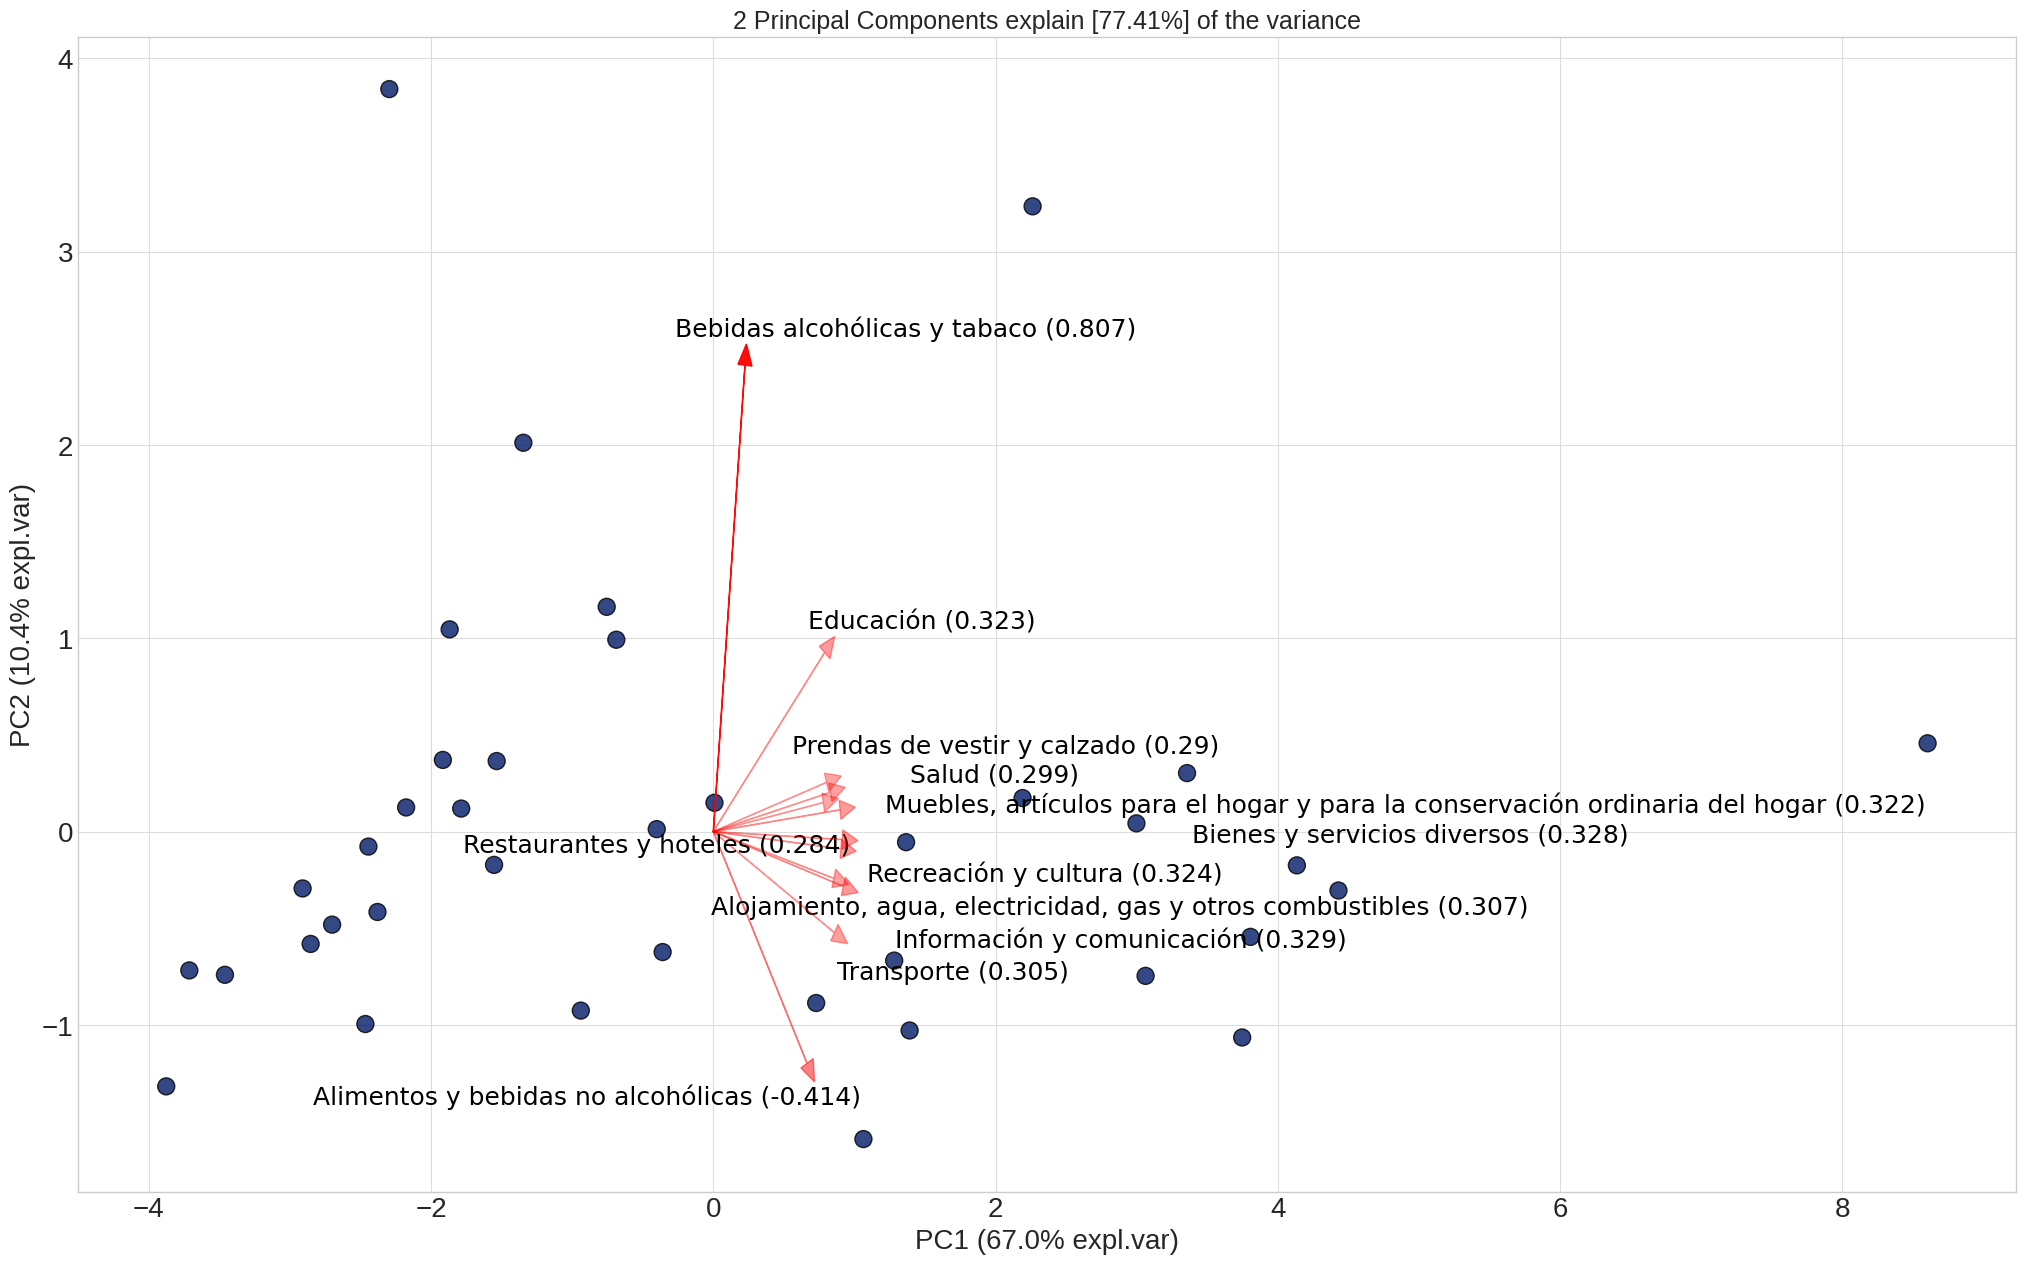

In [32]:
import matplotlib

# Creamos el biplot
fig, ax = model.biplot(legend=False, color_arrow="red", arrowdict={'color_text':"black"})



El biplot mostrado ilustra los dos primeros componentes principales: PC1 y PC2, representados en los ejes x e y, respectivamente. Las flechas indican los *loadings* de las variables en estos componentes, donde la dirección y longitud de cada flecha revelan cómo contribuye cada variable a los componentes principales.

Cada punto en el biplot simboliza una ciudad. La cercanía entre los puntos refleja similitudes en los perfiles de gasto de dichas ciudades. Además, la posición relativa de un punto respecto a los ejes principales nos muestra cómo las características específicas de cada componente influyen en las ciudades.

Las flechas representan variables de gasto. Aquellas que apuntan en la misma dirección sugieren una correlación positiva entre las variables. La longitud de cada flecha mide la magnitud de la influencia de esa variable sobre las ciudades a través de las componentes principales. Por defecto, la gráfica destaca el *loading* mas grande de la variable, por ejemplo,  para **Bebidas alcohólicas y tabaco** destaca el *loading* de 0.807338 en el segundo componente, y para **Prendas de vestir y calzado** el *loading* de 0.290238 en el primer componente.


El biplot es una herramienta poderosa para interpretar un PCA ya que integra información tanto de las observaciones como de las variables en un único gráfico visual. Esto facilita la comprensión de la estructura subyacente de los datos y el modo en que las variables contribuyen a la variabilidad explicada por los componentes principales.

Finalmente, es importante destacar que la interpretación de un biplot puede resultar compleja, especialmente con conjuntos de datos de alta dimensionalidad. No obstante, sigue siendo una herramienta valiosa para la exploración inicial de datos y la visualización de las dinámicas subyacentes en los mismos.

# Referencias


-   Ahumada, H. A., Gabrielli, M. F., Herrera Gomez, M. H., & Sosa
    Escudero, W. (2018). Una nueva econometría: Automatización, big
    data, econometría espacial y estructural.

-   DANE (29 de Septiembre de 2020). Encuesta nacional de presupuestos
    de los hogares (ENPH). Anexos: 32 ciudades y 6 ciudades intermedias.
    <https://www.dane.gov.co/files/investigaciones/boletines/enph/ciudades-enph-2017.xls>

-   Deisenroth, M. P., Faisal, A. A., & Ong, C. S. (2020). Mathematics
    for machine learning. Cambridge University Press.

-   James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An
    introduction to statistical learning (Vol. 112, p. 18). New York:
    springer.

-   Murphy, K. P. (2012). Machine learning: a probabilistic perspective.
    MIT press.

-   Peña, D. (2002). Análisis de datos multivariantes (Vol. 24). Madrid:
    McGraw-hill.
    
-   VanderPlas, J. (2016). Python data science handbook: Essential tools for working with data. " O'Reilly Media, Inc.".
